/tmp/ipykernel_3814555/1135811457.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axB.set_xticklabels(axB.get_xticklabels(), rotation=30, ha="right")


ValueError: Could not interpret value `total_studies` for `y`. An entry with this name does not appear in `data`.

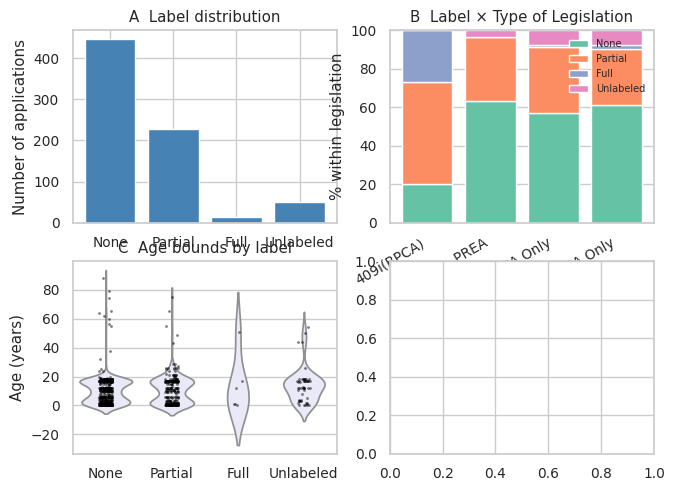

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

##############################################################################
# 0.  load
##############################################################################
REPO_ROOT = Path.cwd().parent   
DATA_DIR   = REPO_ROOT /  "outputs"
df = pd.read_csv(DATA_DIR / "pedx_dataset.csv")
df['label'] = df['label'].str.replace('NotExtrapolated', 'None')
df = df.rename(columns={"total_studies_x": "total_studies"})

##############################################################################
# 1.  pre-calc things we’ll reuse
##############################################################################
order = ["None", "Partial", "Full", "Unlabeled"]

label_counts = (df["label"].value_counts()
                           .reindex(order, fill_value=0))

# panel B ─ proportion of each label within every legislation bucket
legis = (df.groupby(["Type of Legislation", "label"])
           .size()
           .unstack(fill_value=0)
           .loc[:, order])
legis_prop = legis.div(legis.sum(axis=1), axis=0)  # convert to %
legis_prop = legis_prop.sort_index()               # nicer ordering

##############################################################################
# 2.  make the figure
##############################################################################
sns.set_theme(style="whitegrid", font_scale=0.9)
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5.5))
(axA, axB), (axC, axD) = axs

# ── Panel A – label counts ────────────────────────────────────────────────
bars = axA.bar(label_counts.index, label_counts.values, color="steelblue")
axA.set_ylabel("Number of applications")
axA.set_title("A  Label distribution")

# ── Panel B – 100 % stacked bar by legislation ───────────────────────────
bottom = np.zeros(len(legis_prop))
colors = sns.color_palette("Set2", n_colors=len(order))
for col, c in zip(order, colors):
    axB.bar(legis_prop.index, legis_prop[col]*100,
            bottom=bottom, label=col, color=c)
    bottom += legis_prop[col]*100
axB.set_ylabel("% within legislation")
axB.set_xticklabels(axB.get_xticklabels(), rotation=30, ha="right")
axB.set_title("B  Label × Type of Legislation")
axB.legend(frameon=False, loc="upper right", fontsize=7)

# ── Panel C – violin / swarm of age range vs. label ──────────────────────
age_long = (df.melt(id_vars="label", value_vars=["age_min", "age_max"],
                    var_name="bound", value_name="age_years")
              .dropna())
sns.violinplot(ax=axC, data=age_long, x="label", y="age_years",
               order=order, inner=None, color="lavender")
sns.stripplot(ax=axC, data=age_long, x="label", y="age_years",
              order=order, size=2, color="black", alpha=0.5)
axC.set_ylabel("Age (years)")
axC.set_xlabel("")
axC.set_title("C  Age bounds by label")

# ── Panel D – boxplot of total_studies ───────────────────────────────────
sns.boxplot(ax=axD, data=df, x="label", y="total_studies",
            order=order, color="lightcoral")
axD.set_yscale("log")
axD.set_xlabel("")
axD.set_ylabel("Total studies (log-scale)")
axD.set_title("D  Evidence volume by label")

# global tweaks
for ax in axs.flat:
    ax.tick_params(axis="x", rotation=15)
fig.tight_layout()
plt.show()


In [19]:
df.columns

Index(['canon_id', 'kind', 'root', 'supplement', 'Product Labeling Link',
       'label', 'is_gold', 'peds_study_type', 'efficacy_summary', 'pk_summary',
       'rationale', 'confidence', 'Pediatric Labeling Approval Date',
       'Trade Name', 'Generic Name', 'Type of Legislation', 'Indication',
       'Indication(s) Studied', 'Therapeutic Category', 'Dosage Form(s)',
       'Route(s) of Administration', 'Pharmacological Class',
       'Labeling Change Summary', 'age_min', 'age_max', 'Efficacy', 'Safety',
       'Pharmacokinetic', 'Pharmacodynamic', 'Tolerability', 'Other_Type',
       'Randomized_DoubleBlind', 'Randomized_SingleBlind', 'Open_Label',
       'Placebo_Control', 'Active_Comparator', 'Dose_Escalation',
       'Population_PK', 'Other_Design', 'Studied in Neonates',
       'Indicated in Neonates', 'Number of Centers', 'Number of Countries',
       'Patients Analyzed', 'Patients Enrolled',
       'Total #  of American Indian/Alaska Native', 'Total #  of Asian',
       'Total